<a href="https://colab.research.google.com/github/MpRonald/Deep-Learning/blob/main/Builting_First_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Comparing Celsius x Fahrenheit

In [2]:
data_temp = pd.read_csv('https://github.com/MpRonald/datasets/raw/main/Celsius-to-Fahrenheit.csv')
data_temp.reset_index(drop=True, inplace=True)
data_temp.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [3]:
data_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Celsius,30.0,2.0,22.780815,-50.0,-6.75,0.5,7.75,60.0
Fahrenheit,30.0,35.6,41.005466,-58.0,19.85,32.9,45.95,140.0


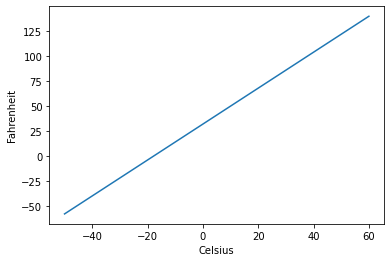

In [4]:
sns.lineplot(data=data_temp, x='Celsius', y='Fahrenheit');

In [7]:
# dividing training model
X_train = data_temp['Celsius']
y_train = data_temp['Fahrenheit']

# builting model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape= [1]))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

# epochs
epochs_hist = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 281ms/step - loss: 2544.1685
Epoch 2/200
1/1 [==============================] - 0s 8ms/step - loss: 1757.5045
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 1234.7052
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 963.1952
Epoch 5/200
1/1 [==============================] - 0s 6ms/step - loss: 902.0155
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 973.4783
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 1079.5846
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 1143.0968
Epoch 9/200
1/1 [==============================] - 0s 6ms/step - loss: 1133.6527
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 1059.8687
Epoch 11/200
1/1 [==============================] - 0s 6ms/step - loss: 948.8398
Epoch 12/200
1/1 [==============================] - 0s 6ms/step - loss: 830.6628
Epoch 13/200
1/1 [==========

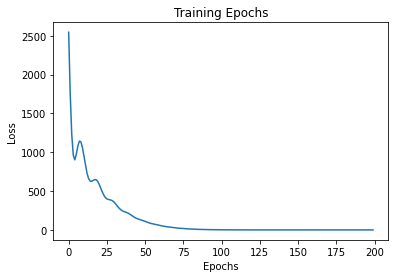

In [13]:
plt.title('Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
sns.lineplot(data=epochs_hist.history['loss']);

In [14]:
model.get_weights()

[array([[1.799978]], dtype=float32), array([32.002922], dtype=float32)]

In [19]:
# checking model
temp_c = 0
temp_f = model.predict([temp_c])
print(f"The {temp_c} degree Celsius is equal to {temp_f[0][0]} degree Fahrenheit")

The 0 degree Celsius is equal to 32.00292205810547 degree Fahrenheit


In [29]:
def convert_temp():
    temp_c = float(input("Type the temperature: "))
    temp_f = model.predict([temp_c])
    print(f"The {temp_c} degree Celsius is equal to {temp_f[0][0]} degree Fahrenheit")

In [32]:
convert_temp()

Type the temperature: 19
The 19.0 degree Celsius is equal to 66.20249938964844 degree Fahrenheit


# Predicting Revenue from Icecream Sales

In [33]:
data_sales = pd.read_csv('https://github.com/MpRonald/datasets/raw/main/SalesData.csv')
data_sales

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [34]:
data_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,500.0,22.232225,8.096388,0.0,17.122258,22.392791,27.740674,45.0
Revenue,500.0,521.570777,175.404751,10.0,405.558681,529.368565,642.257922,1000.0


In [36]:
data_sales.isnull().sum(), data_sales.duplicated().sum()

(Temperature    0
 Revenue        0
 dtype: int64, 0)

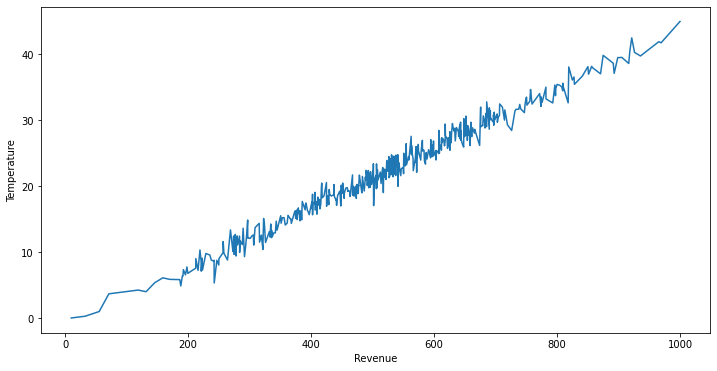

In [43]:
plt.figure(figsize=(12,6))
sns.lineplot(x=data_sales.Revenue, y=data_sales.Temperature);

In [65]:
# dividing training model
X_train2 = data_sales['Temperature']
y_train2 = data_sales['Revenue']

# builting model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(units=1, input_shape= [1]))

# compile model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.7,
                                                    beta_1=0.99,
                                                        beta_2=0.9999,
                                                           epsilon=1e-07),
                                                                loss='mean_squared_error')

# epochs
epochs_hist_sales = model2.fit(X_train2, y_train2, epochs=100)

Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 186681.2500
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 31004.4395
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 8415.5596
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 44211.6758
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 59544.4766
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 40893.9961
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 14271.3193
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 1616.2642
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 6891.4507
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 18074.9082
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 21907.8672
Epoch 12/100
16/16 [==============================] - 0s 3ms/step - loss: 15

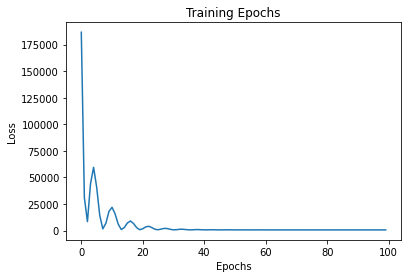

In [66]:
plt.title('Training Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
sns.lineplot(data=epochs_hist_sales.history['loss']);

In [67]:
model2.get_weights()

[array([[21.680037]], dtype=float32), array([39.534058], dtype=float32)]

In [73]:
# checking model
temp = 24.56
rev = model2.predict([temp])
rev

array([[571.9957]], dtype=float32)

In [70]:
data_sales

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


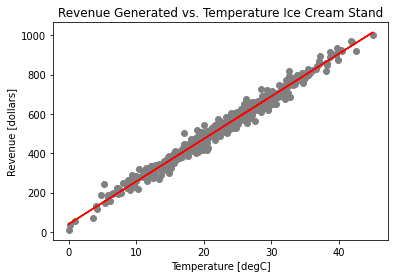

In [72]:
plt.scatter(X_train2, y_train2, color = 'gray')
plt.plot(X_train2, model2.predict(X_train2), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature Ice Cream Stand');